In [179]:
#Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import transform

#Utils
import os
import random
import datetime
from google.colab import files
from shutil import copyfile

#Model
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix

# 1. Data

## 1.1 Memes
Collected by the following searches:
- Memes from Argentina
- Memes from 2020
- Old memes
- New memes

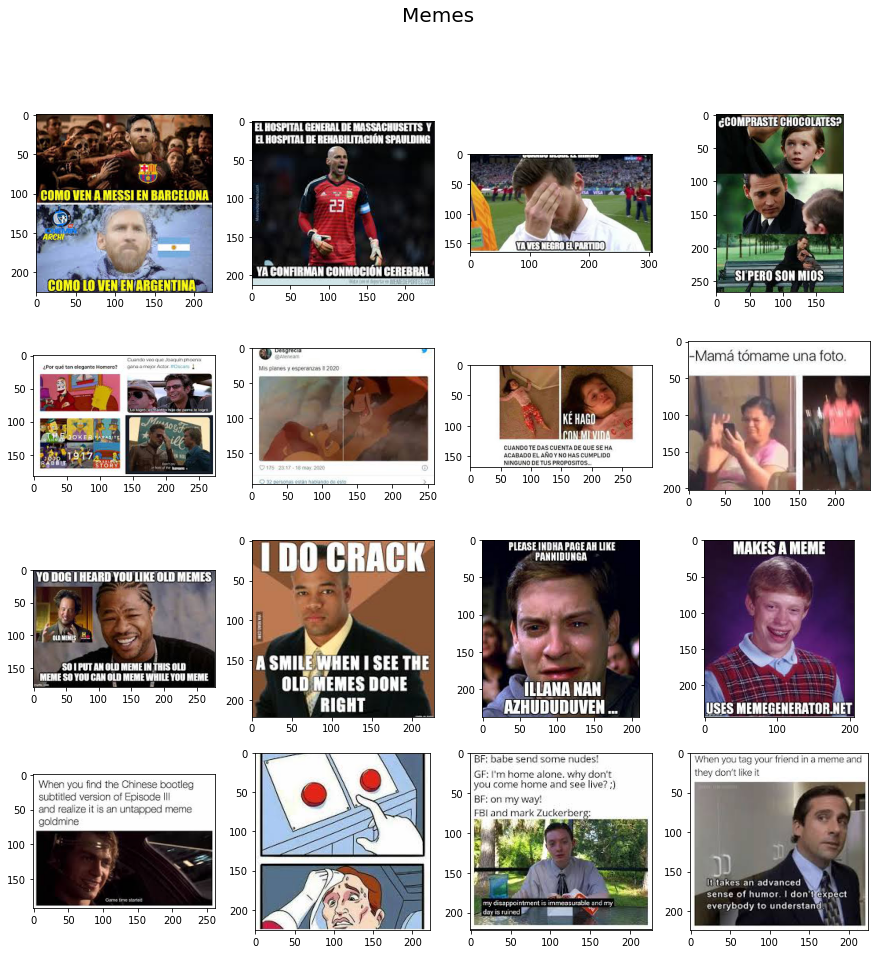

In [2]:
#Memes plot
path = '/content/drive/My Drive/MemeDetector/images/'

f, ax = plt.subplots(nrows = 4, ncols=4, figsize=(15,15))
plt.suptitle('Memes', fontsize=20)

for j in range(4):
  image_path = f'memes/{j}_argentina.jpg'
  img = mpimg.imread(path + image_path)
  ax[0,j].imshow(img)

for j in range(4):
  image_path = f'memes/{j}_2020.jpg'
  img = mpimg.imread(path + image_path)
  ax[1,j].imshow(img)

for j in range(4):
  image_path = f'memes/{j}_old.jpg'
  img = mpimg.imread(path + image_path)
  ax[2,j].imshow(img)

for j in range(4):
  image_path = f'memes/{j}.jpg'
  img = mpimg.imread(path + image_path)
  ax[3,j].imshow(img)

plt.show()

In [3]:
#Memes count
vv = 0
old = 0
new = 0
arg = 0
for file in os.listdir('/content/drive/My Drive/MemeDetector/images/memes/'):
  if file.endswith('_argentina.jpg'):
    arg += 1

  elif file.endswith('_old.jpg'):
    old += 1

  elif file.endswith('_2020.jpg'):
    vv += 1
  
  else:
    new += 1

print('MEME IMAGES:\nArgentina memes:',arg,'\nOld memes:',old,'\n2020 memes:',vv,'\nNew memes:',new)
print('TOTAL MEME IMAGES',old+new+vv+arg)

MEME IMAGES:
Argentina memes: 239 
Old memes: 422 
2020 memes: 242 
New memes: 100
TOTAL MEME IMAGES 1003


## 1.2 Normal photos
Collected by the following searches:

- bar amigos
- mendoza argentina
- gimnasio
- family photo
- selfie real
- university classroom
- party photos
- landscape photos
- autos usados


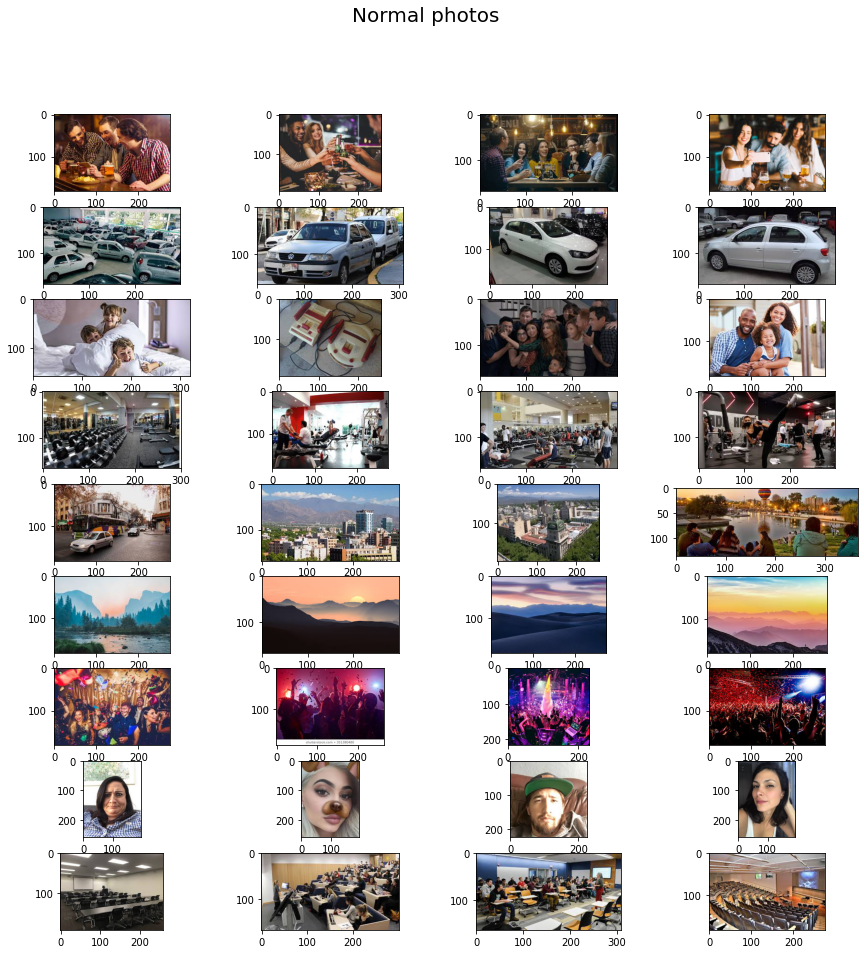

In [4]:
#Normal plot
path = '/content/drive/My Drive/MemeDetector/images/'

f, ax = plt.subplots(nrows = 9, ncols=4, figsize=(15,15))
plt.suptitle('Normal photos', fontsize=20)

for j in range(4):
  image_path = f'normal/{j}_bar.jpg'
  img = mpimg.imread(path + image_path)
  ax[0,j].imshow(img)

for j in range(4):
  image_path = f'normal/{j}_cars.jpg'
  img = mpimg.imread(path + image_path)
  ax[1,j].imshow(img)

for j in range(4):
  image_path = f'normal/{j+100}_family.jpg'
  img = mpimg.imread(path + image_path)
  ax[2,j].imshow(img)

for j in range(4):
  image_path = f'normal/{j}_gym.jpg'
  img = mpimg.imread(path + image_path)
  ax[3,j].imshow(img)

for j in range(4):
  image_path = f'normal/{j}_mendoza.jpg'
  img = mpimg.imread(path + image_path)
  ax[4,j].imshow(img)

for j in range(4):
  image_path = f'normal/{j}_paisaje.jpg'
  img = mpimg.imread(path + image_path)
  ax[5,j].imshow(img)

for j in range(4):
  image_path = f'normal/{j}_party.jpg'
  img = mpimg.imread(path + image_path)
  ax[6,j].imshow(img)

for j in range(4):
  image_path = f'normal/{j}_selfie.jpg'
  img = mpimg.imread(path + image_path)
  ax[7,j].imshow(img)

for j in range(4):
  image_path = f'normal/{j}_universidad.jpg'
  img = mpimg.imread(path + image_path)
  ax[8,j].imshow(img)

plt.show()

In [11]:
#Normal counts
bar = 0
cars = 0
family = 0
gym = 0
mendoza = 0
paisaje = 0
party = 0
selfie = 0
univ = 0

for file in os.listdir('/content/drive/My Drive/MemeDetector/images/normal/'):
  if file.endswith('bar.jpg'):
    bar += 1
  elif file.endswith('cars.jpg'):
    cars += 1
  elif file.endswith('family.jpg'):
    family += 1
  if file.endswith('gym.jpg'):
    gym += 1
  elif file.endswith('mendoza.jpg'):
    mendoza += 1
  elif file.endswith('paisaje.jpg'):
    paisaje += 1
  if file.endswith('party.jpg'):
    party += 1
  elif file.endswith('selfie.jpg'):
    selfie += 1
  elif file.endswith('universidad.jpg'):
    univ += 1
    
print('NORMAL IMAGES:\nBar:',bar,'\nCars:',cars,'\nFamily:',family,'\nGym:',gym,'\nMendoza:',mendoza,'\nPaisaje:',paisaje,'\nParty:',party,'\nSelfie',selfie,'\nUniversity',univ)
print('TOTAL NORMAL IMAGES:',bar+cars+family+gym+mendoza+paisaje+party+selfie+univ)

NORMAL IMAGES:
Bar: 263 
Cars: 113 
Family: 156 
Gym: 170 
Mendoza: 160 
Paisaje: 416 
Party: 83 
Selfie 106 
University 98
TOTAL NORMAL IMAGES: 1565


## 1.3 Split train/test
- First I need to make the dir for the training and testing sets for each class.
- Then I will move shuffled images to those dirs.

*Some code was taken from the Coursera - Deeplearning.ai TensorFlow developer specialization*

In [14]:
#Create directories to split the images into training and testing sets.
os.mkdir('/content/drive/My Drive/MemeDetector/images/split/')
os.mkdir('/content/drive/My Drive/MemeDetector/images/split/training/')
os.mkdir('/content/drive/My Drive/MemeDetector/images/split/testing/')
os.mkdir('/content/drive/My Drive/MemeDetector/images/split/training/memes/')
os.mkdir('/content/drive/My Drive/MemeDetector/images/split/training/normal/')
os.mkdir('/content/drive/My Drive/MemeDetector/images/split/testing/memes/')
os.mkdir('/content/drive/My Drive/MemeDetector/images/split/testing/normal/')

In [15]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE, SAMPLES):

  '''
  This function takes the source folder, and split random images into training and testing folders.

  SOURCE = source directory
  TRAINING = training directory
  TESTING = testing directory
  SPLIT_SIZE = % to split into training set
  SAMPLES = number of samples per class
  '''

  #Append images from SOURCE folder
  dataset = []
  for img in os.listdir(SOURCE):
      path = SOURCE + img
      if (os.path.getsize(path) > 0):
          dataset.append(img)

  #Split values
  train_data_length = int(SAMPLES * SPLIT_SIZE)
  test_data_length = int(SAMPLES - train_data_length)

  #Shuffle images and split
  shuffled_set = random.sample(dataset, len(dataset))
  train_set = shuffled_set[0:train_data_length]
  test_set = shuffled_set[-test_data_length:]
  
  #Train set
  for img in train_set:
      temp_train_data = SOURCE + img
      final_train_data = TRAINING + img
      copyfile(temp_train_data, final_train_data)
  
  print('\tTrain -> Done')

  #Test set
  for img in test_set:
      temp_test_data = SOURCE + img
      final_test_data = TESTING + img
      copyfile(temp_test_data, final_test_data)

  print('\tTest -> Done')

#Folders
MEMES_SOURCE_DIR = "/content/drive/My Drive/MemeDetector/images/memes/"
TRAINING_MEMES_DIR = "/content/drive/My Drive/MemeDetector/images/split/training/memes/"
TESTING_MEMES_DIR = "/content/drive/My Drive/MemeDetector/images/split/testing/memes/"

NORMAL_SOURCE_DIR = "/content/drive/My Drive/MemeDetector/images/normal/"
TRAINING_NORMAL_DIR = "/content/drive/My Drive/MemeDetector/images/split/training/normal/"
TESTING_NORMAL_DIR = "/content/drive/My Drive/MemeDetector/images/split/testing/normal/"

#Split size
split_size = .8

#Run function (this took a while)
#I will be training with 800 images and testing themodel with 200.
print('Memes')
split_data(MEMES_SOURCE_DIR, TRAINING_MEMES_DIR, TESTING_MEMES_DIR, split_size,1000)
print('Memes -> done')
print('\nNormal')
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, TESTING_NORMAL_DIR, split_size,1000)
print('Normal -> done')

Memes
	Train -> Done
	Test -> Done
Memes -> done

Normal
	Train -> Done
	Test -> Done
Normal -> done


In [16]:
#Images verification
print('Length of splits')
print('Train - memes:',len(os.listdir('/content/drive/My Drive/MemeDetector/images/split/training/memes/')))
print('Train - normal:',len(os.listdir('/content/drive/My Drive/MemeDetector/images/split/training/normal/')))
print('Test - memes:',len(os.listdir('/content/drive/My Drive/MemeDetector/images/split/testing/memes/')))
print('Test - normal:',len(os.listdir('/content/drive/My Drive/MemeDetector/images/split/testing/normal/')))

Length of splits
Train - memes: 800
Train - normal: 800
Test - memes: 200
Test - normal: 200


## 1.4 Preprocessing
I will be using the ImageDataGenerator to:
- Rescale (%255)
- Data augmentation
- Define batches
- Define image size

In [141]:
#Images directories
TRAINING_DIR = "/content/drive/My Drive/MemeDetector/images/split/training/"
VALIDATION_DIR = "/content/drive/My Drive/MemeDetector/images/split/testing/"

# Add our data-augmentation parameters to ImageDataGenerator to add more samples.
train_datagen = ImageDataGenerator(rescale = 1./255., #Rescales the values
                                   rotation_range = 10, #Rotates the image between 10º and 0º
                                   width_shift_range = 0.2, #reshape the width
                                   height_shift_range = 0.2, #reshape the height
                                   shear_range = 0.2, #shifts one part of the image
                                   zoom_range = 0.2) #Making vertical/horizontal flip hurts the model, because the is text in meme images.

# The validation data should not be augmented
test_datagen = ImageDataGenerator(rescale = 1./255.)

#Make the generators.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, #Directory for training images
                                                    batch_size = 16, #Batch size
                                                    class_mode = 'binary', #Binary classification
                                                    target_size = (150, 150)) #Make all images the same size

#Same to the validation images.
validation_generator =  test_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size = 1,
                                                         class_mode = 'binary',
                                                         target_size = (150, 150),shuffle=False)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# 2. Model

## 2.1 Baseline model

In [32]:
#Baseline model using Keras Sequential API

model = Sequential()
#256 filters Conv layer + ReLu activation + MaxPooling 2x2
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#256 filters Conv layer + ReLu activation + MaxPooling 2x2
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten layer
model.add(Flatten()) 

#Dense layer
model.add(Dense(64))

#Output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

#Optimizer and Callback to find best learning rate
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Fit the model
history = model.fit_generator(train_generator,
                              epochs=100,
                              verbose=1,
                              validation_data = validation_generator, 
                              callbacks = [lr_schedule])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
  1/100 [..............................] - ETA: 0s - loss: 0.7120 - accuracy: 0.2500WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
100/100 [==============================] - 17s 168ms/step - loss: 0.6903 - accuracy: 0.4975 - val_loss: 0.6912 - val_accuracy: 0.4925
Epoch 2/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6893 - accuracy: 0.5050 - val_loss: 0.6903 - val_accuracy: 0.4925
Epoch 3/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6886 - accuracy: 0.5025 - val_loss: 0.6894 - val_accuracy: 0.4900
Epoch 4/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6884 - accuracy: 0.5063 - val_loss: 0.6884 -

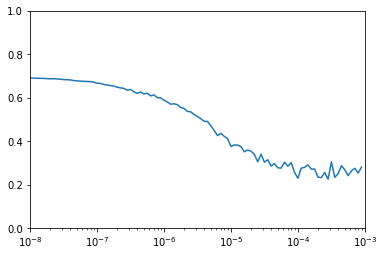

In [40]:
#Learning rate plot
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 1])
plt.show()

#learning_rate = 5e-6

In [120]:
model = Sequential()
#256 filters Conv layer + ReLu activation + MaxPooling 2x2
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#256 filters Conv layer + ReLu activation + MaxPooling 2x2
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten layer
model.add(Flatten()) 

#Dense layer
model.add(Dense(64))

#Output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

#Optimizer
opt = tf.keras.optimizers.Adam(learning_rate = 5e-6)

#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#Fit the model
history_baseline = model.fit_generator(train_generator,
                                       epochs=50,
                                       verbose=1,
                                       validation_data = validation_generator, 
                                       callbacks = [tensorboard_callback])

Epoch 1/50
100/100 [==============================] - 16s 164ms/step - loss: 0.6604 - accuracy: 0.5888 - val_loss: 0.6027 - val_accuracy: 0.5900
Epoch 2/50
100/100 [==============================] - 16s 160ms/step - loss: 0.6131 - accuracy: 0.6731 - val_loss: 0.5335 - val_accuracy: 0.6800
Epoch 3/50
100/100 [==============================] - 16s 159ms/step - loss: 0.5961 - accuracy: 0.6756 - val_loss: 0.4685 - val_accuracy: 0.7575
Epoch 4/50
100/100 [==============================] - 16s 161ms/step - loss: 0.5621 - accuracy: 0.7169 - val_loss: 0.4511 - val_accuracy: 0.7725
Epoch 5/50
100/100 [==============================] - 16s 161ms/step - loss: 0.5459 - accuracy: 0.7131 - val_loss: 0.4048 - val_accuracy: 0.8100
Epoch 6/50
100/100 [==============================] - 16s 161ms/step - loss: 0.5301 - accuracy: 0.7337 - val_loss: 0.3899 - val_accuracy: 0.8325
Epoch 7/50
100/100 [==============================] - 16s 161ms/step - loss: 0.5135 - accuracy: 0.7594 - val_loss: 0.4751 - val_ac

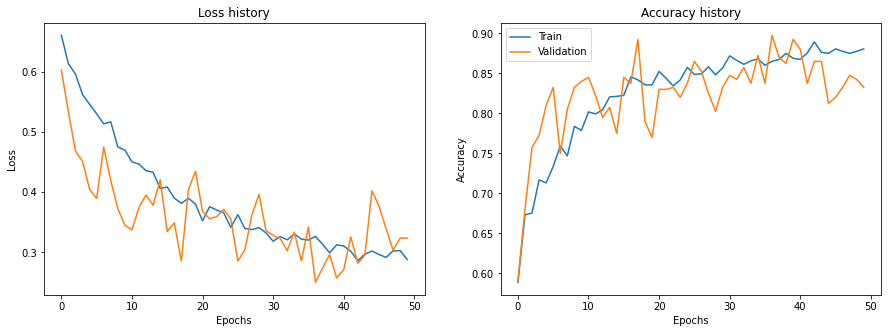

In [121]:
f, ax = plt.subplots(ncols = 2, figsize=(15,5))

ax[0].plot(history_baseline.history['loss'],label='Train')
ax[0].plot(history_baseline.history['val_loss'],label='Validation')
ax[0].set_title('Loss history')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(history_baseline.history['accuracy'],label='Train')
ax[1].plot(history_baseline.history['val_accuracy'],label='Validation')
ax[1].set_title('Accuracy history')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.legend()
plt.show()

## 2.2 InceptionV3 pretrained model

In [103]:
#Download the weights from the trained model.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


path_inception = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
local_weights_file = path_inception

#Create model
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

#Select last layer to use
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

--2020-09-05 19:33:23--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  74.3MB/s    in 1.1s    

2020-09-05 19:33:25 (74.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [109]:
#Create model using the Keras Functional API
#Last output from the InceptionV3 model
x = tf.keras.layers.Flatten()(last_output)
#512 units dense layer
x = tf.keras.layers.Dense(64, activation='relu')(x)
#Dropout layer
x = tf.keras.layers.Dropout(0.2)(x)
#Dropout layer
x = tf.keras.layers.Dense(16, activation='relu')(x)
#Dropout layer
x = tf.keras.layers.Dropout(0.2)(x)
#Output layer
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)           

#Model
model_transfer = tf.keras.Model(pre_trained_model.input, x)

opt = tf.keras.optimizers.Adam(lr = 5e-6)

model_transfer.compile(optimizer = opt, 
                       loss = 'binary_crossentropy', 
                       metrics = ['accuracy'])

history = model_transfer.fit(train_generator,
                             validation_data=validation_generator,
                             epochs=50,
                             verbose=1,
                             callbacks = [tensorboard_callback])

Epoch 1/50
100/100 [==============================] - 18s 182ms/step - loss: 0.6571 - accuracy: 0.6156 - val_loss: 0.5640 - val_accuracy: 0.8425
Epoch 2/50
100/100 [==============================] - 17s 172ms/step - loss: 0.5043 - accuracy: 0.8069 - val_loss: 0.3993 - val_accuracy: 0.8800
Epoch 3/50
100/100 [==============================] - 17s 170ms/step - loss: 0.3937 - accuracy: 0.8544 - val_loss: 0.3061 - val_accuracy: 0.9000
Epoch 4/50
100/100 [==============================] - 17s 172ms/step - loss: 0.3404 - accuracy: 0.8750 - val_loss: 0.2579 - val_accuracy: 0.9250
Epoch 5/50
100/100 [==============================] - 17s 168ms/step - loss: 0.2982 - accuracy: 0.8931 - val_loss: 0.2172 - val_accuracy: 0.9475
Epoch 6/50
100/100 [==============================] - 17s 166ms/step - loss: 0.2732 - accuracy: 0.8994 - val_loss: 0.2024 - val_accuracy: 0.9450
Epoch 7/50
100/100 [==============================] - 16s 165ms/step - loss: 0.2472 - accuracy: 0.9194 - val_loss: 0.1808 - val_ac

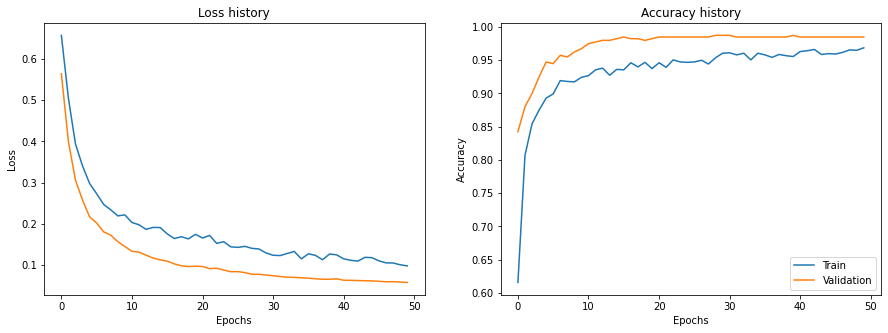

In [118]:
f, ax = plt.subplots(ncols = 2, figsize=(15,5))

ax[0].plot(history.history['loss'],label='Train')
ax[0].plot(history.history['val_loss'],label='Validation')
ax[0].set_title('Loss history')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(history.history['accuracy'],label='Train')
ax[1].plot(history.history['val_accuracy'],label='Validation')
ax[1].set_title('Accuracy history')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.legend()
plt.show()

{'memes': 0, 'normal': 1}


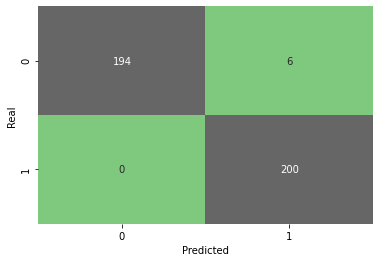

In [156]:
#Confusion matrix
y_pred = model_transfer.predict(validation_generator).round()
y_true = validation_generator.classes
print(validation_generator.class_indices)
plt.figurefigsize=(10,10)
sns.heatmap(confusion_matrix(y_true, y_pred), annot = True, fmt = 'd', cbar = False, cmap = 'Accent')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

The most important value in this project is recall (TP / TP + FN) because I don't want to delete important photos (I prefer the model fails to predict one meme than a normal photo)

In [157]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       200
           1       0.97      1.00      0.99       200

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



In [119]:
#Save model
model_transfer.save('/content/drive/My Drive/MemeDetector/inceptionv3/')

INFO:tensorflow:Assets written to: /content/drive/My Drive/MemeDetector/inceptionv3/assets


### Test images

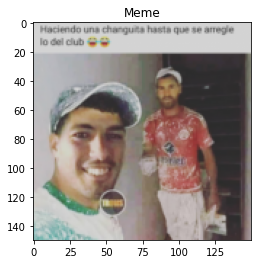

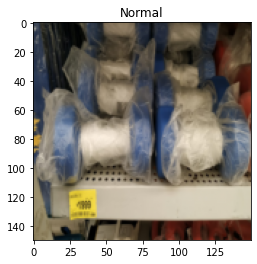

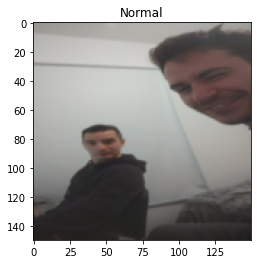

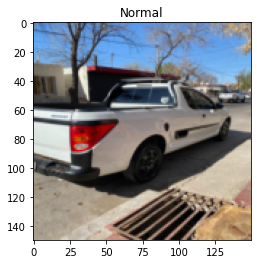

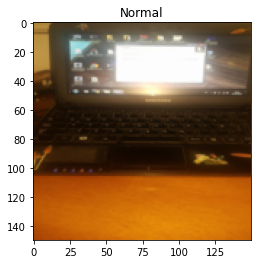

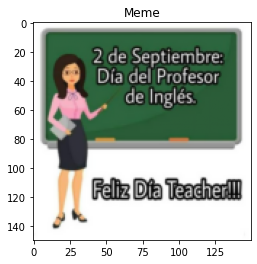

In [178]:
#The model expect a (1,150,150,3) shape input.
#We have to resize to 150x150 and add one dimension.

pred = []
images = []

for img in os.listdir('/content/drive/My Drive/MemeDetector/images/test/'):
  img = mpimg.imread('/content/drive/My Drive/MemeDetector/images/test/'+ img)
  img = transform.resize(img, (150, 150, 3))
  images.append(img)
  img = np.expand_dims(img, axis=0)
  prediction = round(model_transfer.predict(img)[0][0])
  pred.append(prediction)

for img, pred in zip(images,['Meme' if i == 0 else 'Normal' for i in pred]):
  plt.imshow(img)
  plt.title(pred)
  plt.show()